In [2]:
var openDigger = require('../src/open_digger');

In [3]:
var query = openDigger.driver.clickhouse.query;query(    `SHOW DATABASES`).then(res=>{    console.log(res);})

[
  { name: '_temporary_and_external_tables' },
  { name: 'default' },
  { name: 'github_log' },
  { name: 'system' }
]


In [4]:
query(    `SHOW TABLES from github_log`).then(res=>{    console.log(res);})

[
  { name: 'year2015' },
  { name: 'year2016' },
  { name: 'year2017' },
  { name: 'year2018' },
  { name: 'year2019' },
  { name: 'year2020' },
  { name: 'year2021' },
  { name: 'year2022' }
]


[
  [],
  [
    { m: 11, star: 4709, fork: 192 },
    { m: 12, star: 6491, fork: 299 }
  ],
  [
    { m: 1, star: 7257, fork: 351 },
    { m: 2, star: 8218, fork: 433 },
    { m: 3, star: 8560, fork: 449 },
    { m: 4, star: 9484, fork: 510 },
    { m: 5, star: 10006, fork: 581 },
    { m: 6, star: 10286, fork: 612 },
    { m: 7, star: 10816, fork: 669 },
    { m: 8, star: 11054, fork: 685 },
    { m: 9, star: 11326, fork: 699 },
    { m: 10, star: 11711, fork: 728 },
    { m: 11, star: 11976, fork: 744 },
    { m: 12, star: 12102, fork: 759 }
  ],
  [
    { m: 1, star: 12251, fork: 776 },
    { m: 2, star: 12392, fork: 786 },
    { m: 3, star: 12462, fork: 791 },
    { m: 7, star: 14819, fork: 900 },
    { m: 9, star: 15852, fork: 960 },
    { m: 10, star: 19300, fork: 1089 },
    { m: 11, star: 23707, fork: 1330 },
    { m: 12, star: 25944, fork: 1406 }
  ],
  [
    { m: 1, star: 28301, fork: 1494 },
    { m: 2, star: 28750, fork: 1531 },
    { m: 3, star: 30211, fork: 1648 },
    { 

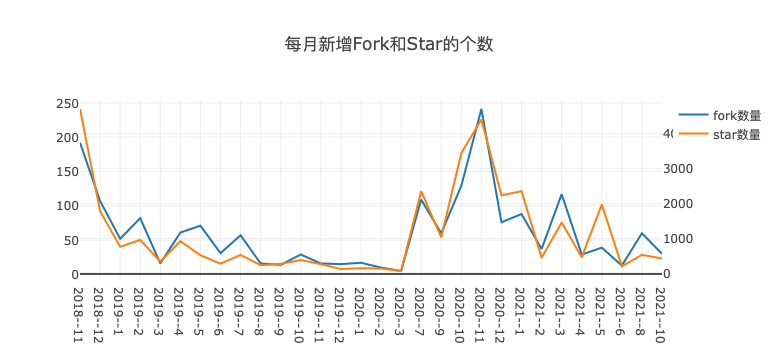

In [6]:
// 1查询每月 repo star和fork
var years = [2017,2018,2019,2020,2021,2022]
Promise.all(
  years.map((year) => {
    return   query( `SELECT  toMonth(created_date) as m, max(repo_stargazers_count) as star ,max(repo_forks_count) as fork
FROM github_log.year${year} 
where repo_name='GitSquared/edex-ui' and repo_stargazers_count >0 and repo_forks_count>0
 group by toMonth(created_date)
`);
  })
).then(res=>{   
    console.log(res)
fork={}
            star={}
            month=[]
            month2=[]
            stars=[]
            forks=[]
          let  year=2016
             for (let i = 0; i < res.length; i++) {
                 year=year+1
             for (let j = 0; j < res[i].length; j++) {
             star[year+'--'+res[i][j].m] = Number(res[i][j].star);
             fork[year+'--'+res[i][j].m] = Number(res[i][j].fork);
                
    }
                
  }

      let lastMonth = 0;  
  for (var key in star){
      month.push(key);
      let thisMonth = star[key];
      stars.push(thisMonth-lastMonth);
      lastMonth = thisMonth;
  }

     lastMonth = 0;  
  for (var key in fork){
      month2.push(key);
      let thisMonth = fork[key];
      forks.push(thisMonth-lastMonth);
      lastMonth = thisMonth;
  }

        
            openDigger.render.plotly([
                            {x: month2, y: forks, mode: 'scatter', name: 'fork数量'},
                            {x: month, y: stars, mode: 'scatter', name: 'star数量', yaxis: 'y2'},
                           ], { title: "每月新增Fork和Star的个数" , 
                                yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
                              });
            });

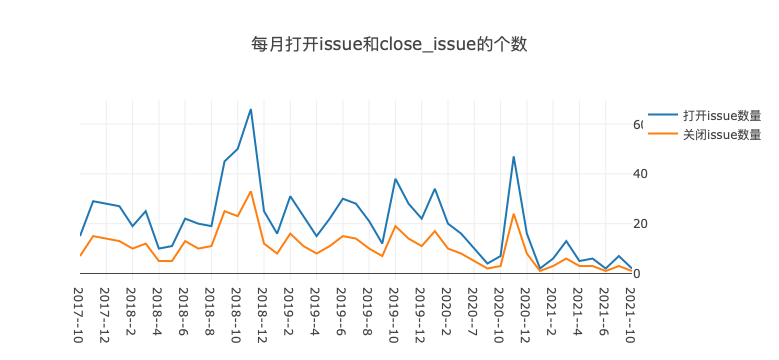

In [8]:
//2查询 打开issue和关闭issue数量
            month=[]
            month2=[]
            issues=[]
            cissues=[]
var years = [2017,2018,2019,2020,2021,2022]
Promise.all(
  years.map((year) => {
    return   query( `SELECT  toMonth(created_date)as m, count(*)issue_id 
 FROM github_log.year${year} 
where repo_name='GitSquared/edex-ui'and type = 'PullRequestEvent'
 group by toMonth(created_date)
`);
  })
).then(res=>{   
            fork={}
            star={}
         
          let  year=2016
             for (let i = 0; i < res.length; i++) {
                 year=year+1
             for (let j = 0; j < res[i].length; j++) {
             star[year+'--'+res[i][j].m] = Number(res[i][j].issue_id);
    }
                
  }
  for (var key in star){
      month.push(key);
      let thisMonth = star[key];
      issues.push(thisMonth);
  }
            });

Promise.all(
  years.map((year) => {
    return   query( `SELECT  toMonth(created_date)as m, count(*)issue_id 
 FROM github_log.year${year} 
where repo_name='GitSquared/edex-ui'and type = 'PullRequestEvent'and issue_created_at<issue_closed_at
 group by toMonth(created_date)
`);
  })
).then(res=>{   
            star={}
          let  year=2016
             for (let i = 0; i < res.length; i++) {
                 year=year+1
             for (let j = 0; j < res[i].length; j++) {
             star[year+'--'+res[i][j].m] = Number(res[i][j].issue_id);
    }
                
  }
  for (var key in star){
      month2.push(key);
      let thisMonth = star[key];
      cissues.push(thisMonth);
  }


        
            openDigger.render.plotly([
                            {x: month, y:  issues, mode: 'scatter', name: '打开issue数量', yaxis: 'y2'},
                            {x: month2, y:  cissues, mode: 'scatter', name: '关闭issue数量', yaxis: 'y2'},
                           ], { title: "每月打开issue和close_issue的个数"  , 
                                yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
                              });
            });

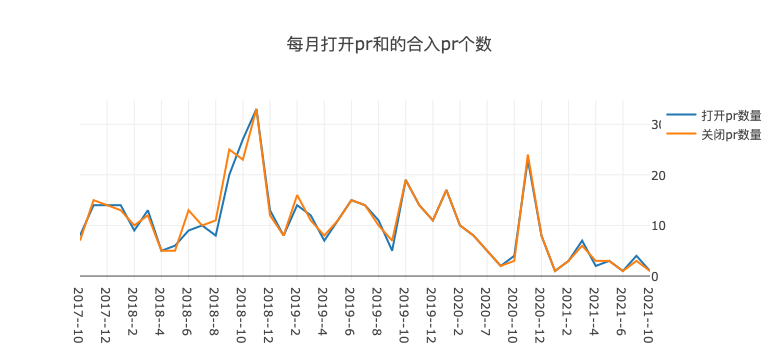

In [13]:
//3每月打开 PR 和合入 PR 的个数
            month=[]
            month2=[]
            open=[]
            close=[]
var years = [2017,2018,2019,2020,2021,2022]
Promise.all(
  years.map((year) => {
    return    query( `SELECT  toMonth(created_date)as m, count(*)open
 FROM github_log.year${year} 
where repo_name='GitSquared/edex-ui'and type = 'PullRequestEvent' and action = 'opened'
 group by toMonth(created_date)
`);
  })
).then(res=>{   
            fork={}
            star={}
         
          let  year=2016
             for (let i = 0; i < res.length; i++) {
                 year=year+1
             for (let j = 0; j < res[i].length; j++) {
             star[year+'--'+res[i][j].m] = Number(res[i][j].open);
    }
                
  }
  for (var key in star){
      month.push(key);
      let thisMonth = star[key];
      open.push(thisMonth);
  }
            });

Promise.all(
  years.map((year) => {
    return   query( `SELECT  toMonth(created_date)as m, count(*)pull_merged_at
 FROM github_log.year${year} 
where repo_name='GitSquared/edex-ui'and type = 'PullRequestEvent' and action ='closed'
 group by toMonth(created_date)
`);
  })
).then(res=>{   
            star={}
          let  year=2016
             for (let i = 0; i < res.length; i++) {
                 year=year+1
             for (let j = 0; j < res[i].length; j++) {
             star[year+'--'+res[i][j].m] = Number(res[i][j].pull_merged_at);
    }
                
  }
  for (var key in star){
      month2.push(key);
      let thisMonth = star[key];
      close.push(thisMonth);
  }


        
            openDigger.render.plotly([
                            {x: month, y:  open, mode: 'scatter', name: '打开pr数量', yaxis: 'y2'},
                            {x: month2, y:  close, mode: 'scatter', name: '关闭pr数量', yaxis: 'y2'},
                           ], { title: "每月打开pr和的合入pr个数"  , 
                                yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
                              });
            });


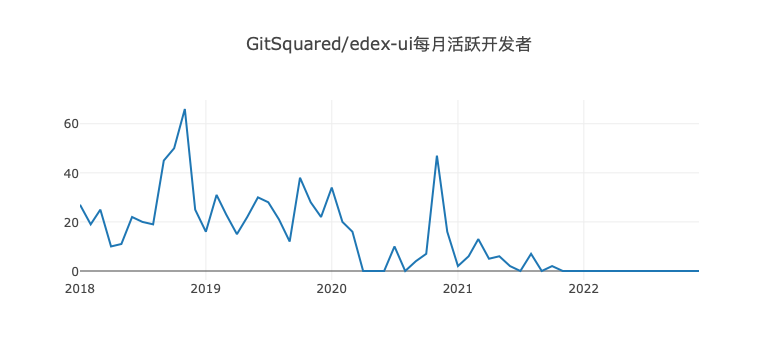

In [28]:
//4

var startYear = 2018,
  endYear = 2022;
var years = [];
var months = [];
var monthsIndex = [];
for (let y = startYear; y <= endYear; y++) years.push(y)
for (let i = 1; i < 13; i++) monthsIndex.push(i)
for (let y = startYear; y <= endYear; y++) //months.push(m);
    for (let m = 1; m < 13; m ++) {
        if (m < 10)
            months.push(y + '-0' + m)
        else months.push(y + '-' + m)
    }
Promise.all(
        months.map((month) => {
             return query(`select distinct count(actor_id) as cnt from github_log.year${month.slice(0,4)} where repo_name ='GitSquared/edex-ui' and toString(created_at) like '${month}%'
             and type = 'PullRequestEvent'
             `)
    })
).then(
    res=>{

        var data = {}

        var cntArray = [];
        var timeArray = [];
        for (let i = 0;i < res.length;i ++) {
            cntArray.push(res[i][0].cnt)
        }
        for (let y = 2018;y < 2023; y ++){
            for (let m = 1;m < 13;m ++){
                if (m > 9)
                    timeArray.push(y+'-'+m)
                else timeArray.push(y+'-0'+m)
            }
        }
        var data = [
            {
              x: timeArray,
              y: cntArray,
              type: 'scatter'
            },
        ];

        openDigger.render.plotly(data, {title: 'GitSquared/edex-ui每月活跃开发者'});
        var values = []
        values.push(monthsIndex)
        for (let i = 0;i < endYear - startYear + 1; i ++){
            let yearCnt = []
            for (let j = 1;j < 13; j ++){
                let index = i * 12 + j;
                yearCnt.push(cntArray[index])
            }
            values.push(yearCnt)
        }
            
        var data = [{
          type: 'table',
          header: {
            values: [["<b>Year</b>"], 
                     ["<b>2018</b>"],["<b>2019</b>"],["<b>2020</b>"],["<b>2021</b>"],["<b>2022</b>"]],
          },
          cells: {
            values: values,
          }
        }]
        
    }
)

In [22]:
5//Issue 从打开到关闭的平均时长和中位数（单位：天）
var year = [2017,2018,2019,2020,2021,2022]
  Promise.all(
  years.map((year) => {
    return query( `SELECT toUnixTimestamp(temp.issue_closed_at)-toUnixTimestamp(temp1.issue_created_at) as time
From github_log.year${year} as temp1,(select issue_created_at,issue_id ,issue_closed_at from github_log.year${year} where repo_name='GitSquared/edex-ui' and
 type = 'PullRequestEvent' and  action = 'closed') as temp
 where temp1.repo_name='GitSquared/edex-ui' and temp1.type='PullRequestEvent'  and temp.issue_id=temp1.issue_id and temp1.action='opened'
`);
  })
).then(res=>{   
      function sortNumber(a,b){
      return a - b
      }
             times=[]
            let sum=0 
            let len=0
            for(let i= 0;  i < res.length;i++){
                len=len+res[i].length
            for (let j = 0; j < res[i].length; j++) {
                  times[i*res[i].length+j] = Number(res[i][j].time);
                  sum+=Number(res[i][j].time)
                    }
            }
              sum=sum/len
             times.sort(sortNumber)
             console.log(sum/86400+'天平均时间解决issue')
             console.log(times[len/2]/86400+'天中位数时间解决issue')        
          });


1.0029915967399692天平均时间解决issue
0.5050578703703704天中位数时间解决issue


In [38]:
6//PR 从打开到合入的平均时长和中位数（单位：天）
var year = [2016,2017,2018,2019,2020,2021,2022]

Promise.all(
  years.map((year) => {
    return query( `SELECT toUnixTimestamp(temp1.pull_merged_at)-toUnixTimestamp(temp.created_at) as time
From github_log.year${year} as temp1,(select created_at,issue_id from github_log.year${year} where repo_name='GitSquared/edex-ui' and
 type = 'PullRequestEvent' and action ='opened') as temp
 where temp1.repo_name='GitSquared/edex-ui' and temp1.type='PullRequestEvent' and temp1.pull_merged=1 and temp.issue_id=temp1.issue_id
`);
  })
).then(res=>{   
      function sortNumber(a,b){
      return a - b
      }
            times=[]
            let sum=0 
            let len=0
            for(let i= 0;  i < res.length;i++){
                len=len+res[i].length
            for (let j = 0; j < res[i].length; j++) {
                  times[i*res[i].length+j] = Number(res[i][j].time);
                  sum+=Number(res[i][j].time)
                    }
            }
              sum=sum/len
             times.sort(sortNumber)
             console.log(sum/86400+'天平均时间pr')
             console.log(times[(len+1)/2]/86400+'天中位数时间pr')        
          });



0.5572417116964989天平均时间pr
0.17805555555555555天中位数时间pr


In [36]:
//7 issue和PR从打开到第一次有人回复(非本人)的平均时长和中位数（单位：天）
var year = [2016,2017,2018,2019,2020,2021,2022]

Promise.all(
  years.map((year) => {
    return query( `SELECT toUnixTimestamp(issue_comment_created_at)-toUnixTimestamp(issue_created_at) as time
From github_log.year${year} 
 where repo_name='GitSquared/edex-ui' and type='IssueCommentEvent'  and issue_author_id<>
 issue_comment_author_id
`);
  })
).then(res=>{   
      function sortNumber(a,b){
      return a - b
      }
            times=[]
            let sum=0 
            let len=0
            for(let i= 0;  i < res.length;i++){
                len=len+res[i].length
            for (let j = 0; j < res[i].length; j++) {
                  times[i*res[i].length+j] = Number(res[i][j].time);
                  sum+=Number(res[i][j].time)
                    }
            }
              sum=sum/len
             times.sort(sortNumber)
             console.log('第一次有人回复(非本人)的平均时长'+sum/86400+'天')
             console.log('第一次有人回复(非本人)的中位数'+times[len/2]/86400+'天')        
          });

第一次有人回复(非本人)的平均时长29.910131128448008天
第一次有人回复(非本人)的中位数1.9350462962962962天


In [2]:
console.log('1. 2018年11月，是本项目最活跃、拥有最多star和fork增长、最多issue打开关闭、最多pr的时间段，之后开始缓慢回落，但star和fork仍保持稳定持续的增长，issue的打开关闭和pr的打开合入也保持稳定持续的状态。\n2. 2020年11月，项目活跃度达到第二高峰。')

1. 2018年11月，是本项目最活跃、拥有最多star和fork增长、最多issue打开关闭、最多pr的时间段，之后开始缓慢回落，但star和fork仍保持稳定持续的增长，issue的打开关闭和pr的打开合入也保持稳定持续的状态。
2. 2020年11月，项目活跃度达到第二高峰。
